Instructions:
1. Choose a unique dataset from: https://archive.ics.uci.edu
2. Your dataset should be unique from your classmates otherwise no points will be given for this exercise.
### Complete the Tasks in bold

## Data Exploration

**TASK: Create a correlation heatmap.**

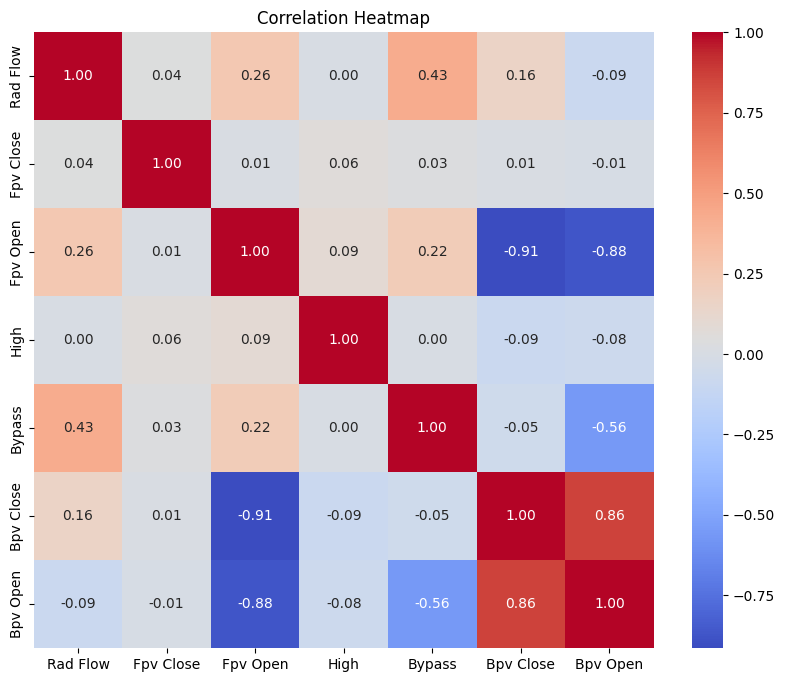

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
shuttle = fetch_ucirepo(id=148) 
  
# data (as pandas dataframes) 
X = shuttle.data.features 
y = shuttle.data.targets 

# Create a DataFrame from the features
df = pd.DataFrame(X, columns=shuttle.data.feature_names)

# Handle categorical variables: Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Rad Flow', 'Fpv Close', 'Fpv Open', 'High', 'Bypass', 'Bpv Close', 'Bpv Open'])

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

In [2]:
# Calculate the correlation between each feature and the target label
correlation_with_target = df_encoded.corrwith(X.iloc[:, -1])

# Get the absolute correlation values
absolute_correlation = correlation_with_target.abs()

# Sort the correlation values in descending order
sorted_correlation = absolute_correlation.sort_values(ascending=False)

# Get the top 5 correlated features
top_correlated_features = sorted_correlation.head(5)

print("Top 5 correlated features with the target label:")
print(top_correlated_features)

Top 5 correlated features with the target label:
Bypass_4        0.566597
Bpv Open_0      0.396637
Fpv Open_-40    0.367342
Bypass_3        0.337294
Fpv Open_-42    0.311821
dtype: float64


## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: Do not forget to put a random_state for reproducibility.*

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
knn = KNeighborsClassifier()

knn.get_params().keys()

operations = [('scaler',scaler),('knn',knn)]
pipe = Pipeline(operations)

**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [10]:
from sklearn.model_selection import GridSearchCV

k_values = list(range(1,20))
param_grid = {'knn__n_neighbors': k_values}
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

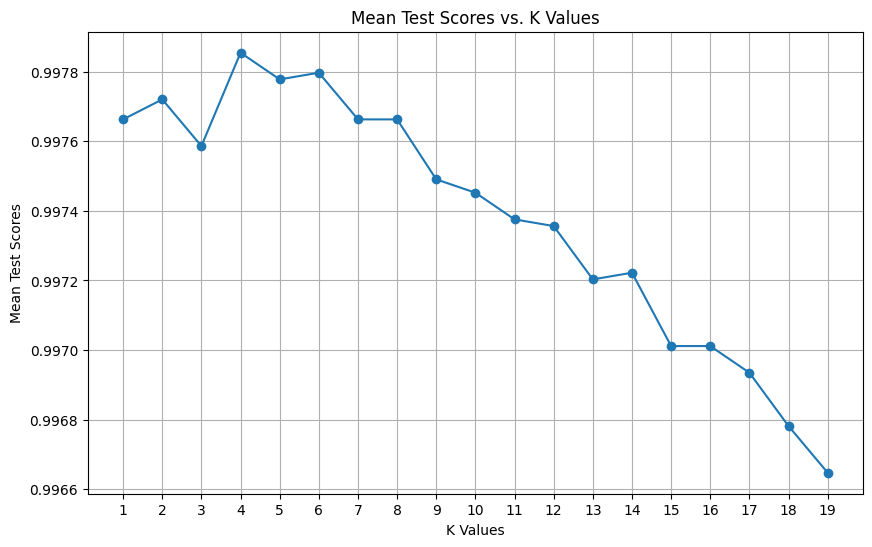

In [11]:
mean_test_scores = full_cv_classifier.cv_results_['mean_test_score']
k_values = list(range(1, 20))

# Plot mean test scores against K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores, marker='o', linestyle='-')
plt.title('Mean Test Scores vs. K Values')
plt.xlabel('K Values')
plt.ylabel('Mean Test Scores')
plt.xticks(k_values)
plt.grid(True)
plt.show()

### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4550
           2       1.00      0.88      0.93         8
           3       0.87      0.62      0.72        21
           4       1.00      1.00      1.00       891
           5       1.00      1.00      1.00       329
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0

    accuracy                           1.00      5800
   macro avg       0.69      0.64      0.66      5800
weighted avg       1.00      1.00      1.00      5800



<Figure size 800x600 with 0 Axes>

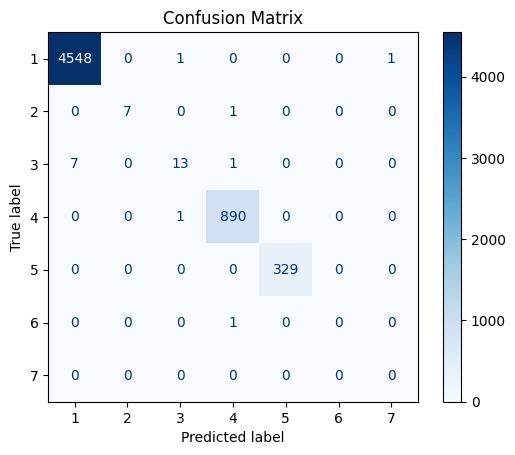

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# Get the best estimator from GridSearchCV
best_estimator = full_cv_classifier.best_estimator_

# Use the best estimator to make predictions on the test data
y_pred = best_estimator.predict(X_test)

# Generate classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_estimator.classes_)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()